<a href="https://colab.research.google.com/github/DL4CV-NPTEL/Deep-Learning-For-Computer-Vision/blob/main/notebooks/Week_6/Week_6_Lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 1: Explaining CNNs: Visualization Methods



In [ ]:
#@title 
from ipywidgets import widgets
out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id=f"u3FBpyUA1dc", width=854, height=480, fs=1, rel=0)
  print("Video available at https://youtube.com/watch?v=" + video.id)
  display(video)
display(out1)

Output()

In [ ]:
#@title 
from IPython import display as IPyDisplay
IPyDisplay.HTML(
    f"""
  <div>
    <a href= "https://github.com/DL4CV-NPTEL/Deep-Learning-For-Computer-Vision/blob/main/Slides/Week_6/DL4CV_Week06_Part01.pdf" target="_blank">
    <img src="https://github.com/DL4CV-NPTEL/Deep-Learning-For-Computer-Vision/blob/main/Data/Slides_Logo.png?raw=1"
  alt="button link to Airtable" style="width:200px"></a>
    </div>""" )

## Visualize Filters/Kernels (First Layer)

First, let's load the pretrained model:

In [ ]:
import torchvision.models as models
import torch

# Load the pretrained model
model = models.resnet50(pretrained=True)

# Use the model in evaluation mode
model.eval()

Next, we need an input image. Here's how you can transform an image so it can be input into the model:

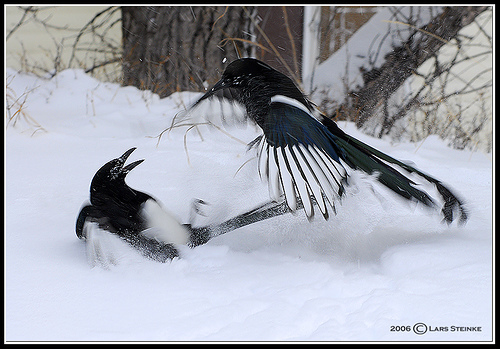

In [18]:
from PIL import Image
import torchvision.transforms as transforms
import urllib.request
# Open the image 
urllib.request.urlretrieve('https://raw.githubusercontent.com/DL4CV-NPTEL/Deep-Learning-For-Computer-Vision/main/Data/Week_6/Lec1/1.JPEG', '1.JPEG')
image = Image.open('1.JPEG')
image.show()


In [ ]:
# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
    transforms.ToTensor(),  # Convert the image to PyTorch Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Apply the transformation to the image
image = transform(image)

# Add an extra dimension for the batch
image = image.unsqueeze(0)

Now, let's modify the model to retain the output of each layer. We'll define a forward hook for each layer and store the output

In [5]:
outputs = []

def hook(module, input, output):
    outputs.append(output)

for layer in model.children():
    # Attach a hook to the layer
    layer.register_forward_hook(hook)

We can now input our image into the model, which will store the output of each layer in outputs:

In [ ]:
# Forward pass the image through the model
model(image)

Finally, we can visualize the outputs. Here's how you can visualize the output of the first layer (the first convolutional layer):

Shape of the first layer output: (1, 64, 112, 112)


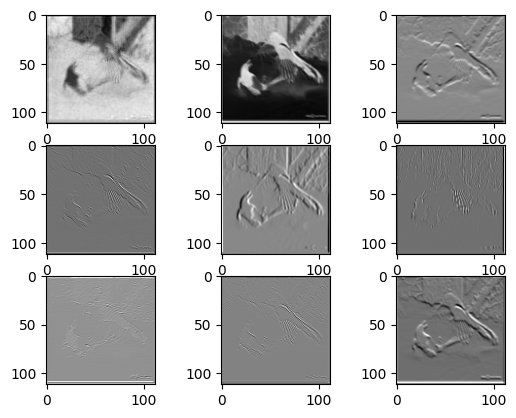

In [27]:
import matplotlib.pyplot as plt

# Get the first output (the output of the first layer)
first_layer_output = outputs[0]

# Detach the output from the rest of the graph and convert it to numpy
first_layer_output = first_layer_output.detach().numpy()
print('Shape of the first layer output:',first_layer_output.shape)
# For visualization purposes, we'll just look at the output of the first filter
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.imshow(first_layer_output[0, i, :, :], cmap='gray')
